# Flood Assessment

<b>Description:-</b><br>

Flood Assessment project deals with the identifying the causes and impacts of urban flooding with the help of given dataset. The analysis is done in order to plan and develop the urban area overcoming from the flooding. The dataset conists of many variables broadly categorized as social and infrastructure variables (or) factors. With the help of these variables, the outcome is derived by conducting Principal Componenet Analysis(PCA) on the data. The output of PCA is expected to be in the form of bi-plot, scree plot, dendrogram with heatmap better explaining the results.


<b>Objectives:-</b>
1) To conduct Principal Component Analysis (PCA) on the data collected followed by Sensitivity Analysis. 

2) Significance testing of human factors on the variables of vulnerability (Income, Nature of dwelling unit etc (Hypothesis testing)

3) Correlation analysis between influential factors and protective coping behaviours.


## Step 1: Problem statement
 
*	What type of data do you have, structured/unstructured?<br>
<b>Answer: </b> The data is structured because we have all the labels/columns marked already.
*	What are you predicting?<br>
<b>Answer: </b> We are predicting the cause and impacts of flood while developing the urban using social and infrastructure variables.
*	What type of problem is it? <br>
<b>Answer: </b> Principal Componenet Analysis(PCA) 
*	Do you need to combine multiple data sources?<br>
<b>Answer: </b> No, because all the data we need is in this dataset.
*	Articulate the final outcome that you hope to achieve with this analysis<br>
<b>Answer: </b> Find out the major vulnerability of urban flooding.
*	What is the business problem you are trying to solve?<br>
<b>Answer: </b> Causes and impacts of flood disaster in urban development
*	What is the impact on a business or stakeholder of your project and how would it help them?<br>
<b>Answer: </b> Help them to develop urban by controlling the flood disaster with the help of analysing dataset.
*	Which Industry segment does your project fall into? (These help come up with project labels)<br>
<b>Answer: </b> Urban development
*	Which ML domain does your project fall into? (These help come up with project labels) <br>
<b>Answer: </b> Principal Componenet Analysis(PCA) 

## Step 2: Data Acquisition
In this section you will talk about how you found the data.
*	Make sure that you mention the source of your data.
*	If you are using multiple datasets, make sure you mention the source of all of those datasets and mention why you are using the datasets
*   Add sample Data Model diagrams if you can come up with any.<br>

<b>Answer: </b> We will build a model to predict causes and factors of urban flooding, and this is the only dataset we'll be using for this project. (If you are using multiple datasets, make sure to include every single one of them here.)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

df = pd.read_csv('survey0_with_zones - survey0_with_zones (1).csv')
df

,zone,house_hold_size,income,total_males,total_females,total_tg,highest_ed_males,highest_ed_females,highest_ed_tg,age_lt_6,...,Flood_events_experienced,Depth_water_logging,Water_removal_process,Evacuated_before,Dist_to_evacuated_area,Medical_conditions_during_ waterLogging,Loss_working_days_during_floods,Income_loss_per_day,Experience _with_flood,Financial_loss_due_to floods
0,south,5,30000,2,3,0,Graduate,Graduate,NaN,0,...,>5 & more,1-1/2 ft,Naturally,No,NaN,Yes,1-3 Days,40-60%,10-25 years,2000-6000
1,north,3,16000,2,1,0,Secondary,Secondary,NaN,0,...,>5 & more,1 ft,Naturally,Yes,1 - 3 km,Yes,4-6 Days,20-40%,<10 years,2000-6000
2,southwest,5,22000,1,4,0,Primary,Secondary,NaN,0,...,3,1 ft,Naturally,No,NaN,No,1-3 Days,40-60%,<10 years,2000-6000
3,north,2,11000,1,1,0,Primary,Secondary,NaN,0,...,1,> 2 ft,Naturally,No,NaN,Yes,> 7 Days,>80%/almost full,10-25 years,10000-15000
4,central,3,12000,2,1,0,Higher Secondary,Illiterate,NaN,0,...,2,6 inch or below,Manually,No,NaN,Yes,1-3 Days,40-60%,<10 years,<2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,south,3,29000,2,1,0,Secondary,Secondary,NaN,0,...,3,1 ft,Manually,Yes,<1 km,No,4-6 Days,40-60%,<10 years,No loss but a lot of inconvenience
716,south,2,51000,1,1,0,Graduate,Secondary,NaN,0,...,3,1-1/2 ft,Mechanically,No,NaN,No,1-3 Days,Negligible/<20%,<10 years,2000-6000
717,south,2,52000,1,1,0,Graduate,Primary,NaN,0,...,3,1 ft,Mechanically,No,NaN,No,1-3 Days,Negligible/<20%,10-25 years,No loss but a lot of inconvenience
718,south,3,42000,2,1,0,Higher Secondary,Illiterate,NaN,0,...,3,1 ft,Mechanically,No,NaN,No,1-3 Days,20-40%,10-25 years,No loss but a lot of inconvenience


## Step 3: Data Cleaning

### Drop rows having NaN in all the columns

In [7]:
df.describe()

,house_hold_size,income,total_males,total_females,total_tg,age_lt_6,age_7_to_14,age_15_to_29,age_30_to_59,age_gt_60,no_males_working,no_of_females_working,no_youngage_workingmembers,no_middleage_workingmembers,no_oldage_workingmembers
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,3.959722,35175.000000,1.927778,1.894444,0.136111,0.262500,0.398611,1.119444,1.865278,0.313889,1.152778,0.409722,0.422222,1.155556,0.119444
std,1.516636,37116.925163,0.898341,0.934561,1.240632,0.572173,0.696303,1.090946,0.995073,0.602569,0.591072,0.538028,0.850137,0.860651,0.349304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,15000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,28000.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,5.000000,44000.000000,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000
max,17.000000,500000.000000,5.000000,5.000000,17.000000,3.000000,3.000000,9.000000,7.000000,4.000000,4.000000,3.000000,9.000000,7.000000,3.000000


The dataset has 720 records.
There are 76 features

15 columns are numeric in nature

720 rows have numeric values

In [8]:
df.fillna(0, inplace=True)
numeric_cols = df.select_dtypes([np.number])
df[numeric_cols.columns]= numeric_cols.round().astype('int64')
df_numeric=df[numeric_cols.columns]
df_numeric

,house_hold_size,income,total_males,total_females,total_tg,age_lt_6,age_7_to_14,age_15_to_29,age_30_to_59,age_gt_60,no_males_working,no_of_females_working,no_youngage_workingmembers,no_middleage_workingmembers,no_oldage_workingmembers
0,5,30000,2,3,0,0,0,1,2,2,1,1,1,1,0
1,3,16000,2,1,0,0,0,1,1,1,1,0,0,1,0
2,5,22000,1,4,0,0,2,1,2,0,1,1,0,2,0
3,2,11000,1,1,0,0,0,0,2,0,1,1,0,2,0
4,3,12000,2,1,0,0,0,1,2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,29000,2,1,0,0,1,0,2,0,1,1,0,2,0
716,2,51000,1,1,0,0,0,0,2,0,1,1,0,2,0
717,2,52000,1,1,0,0,0,2,0,0,1,0,1,0,0
718,3,42000,2,1,0,0,0,2,1,0,1,0,1,0,0


### Replacing NaN with zero

In [9]:
df_non_numeric = df.drop(columns=numeric_cols)
df_non_numeric

,zone,highest_ed_males,highest_ed_females,highest_ed_tg,primary_occu_males,primary_occu_females,Dwelling_Nature,House_typology,Building level,Floors_above,...,Flood_events_experienced,Depth_water_logging,Water_removal_process,Evacuated_before,Dist_to_evacuated_area,Medical_conditions_during_ waterLogging,Loss_working_days_during_floods,Income_loss_per_day,Experience _with_flood,Financial_loss_due_to floods
0,south,Graduate,Graduate,0,Government (state/central/private/retired),Government (state/central/private/retired),Pucca,Individual House,Ground level,G only,...,>5 & more,1-1/2 ft,Naturally,No,0,Yes,1-3 Days,40-60%,10-25 years,2000-6000
1,north,Secondary,Secondary,0,Informal Job / Hawker,0,Kuccha,Squatter/Encroachment,Ground level,G only,...,>5 & more,1 ft,Naturally,Yes,1 - 3 km,Yes,4-6 Days,20-40%,<10 years,2000-6000
2,southwest,Primary,Secondary,0,Administrative / Clerks,Government (state/central/private/retired),Pucca,Individual House,Raised on Columns,G + 2,...,3,1 ft,Naturally,No,0,No,1-3 Days,40-60%,<10 years,2000-6000
3,north,Primary,Secondary,0,Informal Job / Hawker,Informal Job / Hawker,Kuccha,Squatter/Encroachment,Ground level,G only,...,1,> 2 ft,Naturally,No,0,Yes,> 7 Days,>80%/almost full,10-25 years,10000-15000
4,central,Higher Secondary,Illiterate,0,Informal Job / Hawker,0,Kuccha,Squatter/Encroachment,Ground level,G only,...,2,6 inch or below,Manually,No,0,Yes,1-3 Days,40-60%,<10 years,<2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,south,Secondary,Secondary,0,Administrative / Clerks,Light / Small scale industry,Pucca,Individual House,Ground level,G + 3,...,3,1 ft,Manually,Yes,<1 km,No,4-6 Days,40-60%,<10 years,No loss but a lot of inconvenience
716,south,Graduate,Secondary,0,Government (state/central/private/retired),Business / Trade Industry,Pucca,Individual House,Ground level,G + 2,...,3,1-1/2 ft,Mechanically,No,0,No,1-3 Days,Negligible/<20%,<10 years,2000-6000
717,south,Graduate,Primary,0,Light / Small scale industry,0,Pucca,Individual House,Ground level,G + 1,...,3,1 ft,Mechanically,No,0,No,1-3 Days,Negligible/<20%,10-25 years,No loss but a lot of inconvenience
718,south,Higher Secondary,Illiterate,0,Light / Small scale industry,0,Pucca,Individual House,Ground level,G + 2,...,3,1 ft,Mechanically,No,0,No,1-3 Days,20-40%,10-25 years,No loss but a lot of inconvenience


## Find out categorical variables

Criteria is less than 10(N) unique values.

In [10]:
N=10
non_numeric_cols = df_non_numeric.columns
likely_categorical_col_names = []
for col in non_numeric_cols:
    if len(df_non_numeric[col].unique()) <= N:
        likely_categorical_col_names.append(col)       
print('No of likely_categorical_col_names', len(likely_categorical_col_names))
print(likely_categorical_col_names)

No of likely_categorical_col_names 61
['zone', 'highest_ed_males', 'highest_ed_females', 'highest_ed_tg', 'primary_occu_males', 'primary_occu_females', 'Dwelling_Nature', 'House_typology', 'Building level', 'Floors_above', 'Road_type', 'Road_width', 'Road_material', 'Category', 'Duration_stay', 'Age_house', 'House_Ownership', 'Fam_Type', 'Source_waterSupply', 'Distance_watersupply_source', 'Qlty_drinking_water_normal days', 'Water_Quality_monsoons', 'Quantity_drinking water_normal days', 'Quantity_drinking_water_during_flooding', 'Drinking_water_treatment', 'Issues_with_drinking_water_solved_by', 'Toilet_Facility', 'Dist_community_toilets', 'Sewage_Disposal_System', 'Drains_Situation', 'Drainage_channel_connected_to_city_network', 'Cleaning_agent', 'Frequency_of_drain_cleaning', 'If_naturally_howMuchTime', 'Electricity_Source', 'PowerCut_Frequency', 'Proficiency_digital_services', 'television', 'computer_laptop', 'internet_connectivity', 'radio', 'mobile', 'bi-cycle', 'motorised', 'no_

### For each categorical column add another column_name_encoded

In [11]:
df_encoded = df_non_numeric[likely_categorical_col_names].add_suffix('_encoded')
df_encoded

,zone_encoded,highest_ed_males_encoded,highest_ed_females_encoded,highest_ed_tg_encoded,primary_occu_males_encoded,primary_occu_females_encoded,Dwelling_Nature_encoded,House_typology_encoded,Building level_encoded,Floors_above_encoded,...,Flood_events_experienced_encoded,Depth_water_logging_encoded,Water_removal_process_encoded,Evacuated_before_encoded,Dist_to_evacuated_area_encoded,Medical_conditions_during_ waterLogging_encoded,Loss_working_days_during_floods_encoded,Income_loss_per_day_encoded,Experience _with_flood_encoded,Financial_loss_due_to floods_encoded
0,south,Graduate,Graduate,0,Government (state/central/private/retired),Government (state/central/private/retired),Pucca,Individual House,Ground level,G only,...,>5 & more,1-1/2 ft,Naturally,No,0,Yes,1-3 Days,40-60%,10-25 years,2000-6000
1,north,Secondary,Secondary,0,Informal Job / Hawker,0,Kuccha,Squatter/Encroachment,Ground level,G only,...,>5 & more,1 ft,Naturally,Yes,1 - 3 km,Yes,4-6 Days,20-40%,<10 years,2000-6000
2,southwest,Primary,Secondary,0,Administrative / Clerks,Government (state/central/private/retired),Pucca,Individual House,Raised on Columns,G + 2,...,3,1 ft,Naturally,No,0,No,1-3 Days,40-60%,<10 years,2000-6000
3,north,Primary,Secondary,0,Informal Job / Hawker,Informal Job / Hawker,Kuccha,Squatter/Encroachment,Ground level,G only,...,1,> 2 ft,Naturally,No,0,Yes,> 7 Days,>80%/almost full,10-25 years,10000-15000
4,central,Higher Secondary,Illiterate,0,Informal Job / Hawker,0,Kuccha,Squatter/Encroachment,Ground level,G only,...,2,6 inch or below,Manually,No,0,Yes,1-3 Days,40-60%,<10 years,<2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,south,Secondary,Secondary,0,Administrative / Clerks,Light / Small scale industry,Pucca,Individual House,Ground level,G + 3,...,3,1 ft,Manually,Yes,<1 km,No,4-6 Days,40-60%,<10 years,No loss but a lot of inconvenience
716,south,Graduate,Secondary,0,Government (state/central/private/retired),Business / Trade Industry,Pucca,Individual House,Ground level,G + 2,...,3,1-1/2 ft,Mechanically,No,0,No,1-3 Days,Negligible/<20%,<10 years,2000-6000
717,south,Graduate,Primary,0,Light / Small scale industry,0,Pucca,Individual House,Ground level,G + 1,...,3,1 ft,Mechanically,No,0,No,1-3 Days,Negligible/<20%,10-25 years,No loss but a lot of inconvenience
718,south,Higher Secondary,Illiterate,0,Light / Small scale industry,0,Pucca,Individual House,Ground level,G + 2,...,3,1 ft,Mechanically,No,0,No,1-3 Days,20-40%,10-25 years,No loss but a lot of inconvenience


In [12]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline


# class MultiColumnLabelEncoder:
#     def __init__(self,columns = None):
#         self.columns = columns # array of column names to encode

#     def fit(self,X,y=None):
#         return self # not relevant here

#     def transform(self,X):
#         '''
#         Transforms columns of X specified in self.columns using
#         LabelEncoder(). If no columns specified, transforms all
#         columns in X.
#         '''
#         output = X.copy()
#         if self.columns is not None:
#             for col in self.columns:
#                 output[col] = LabelEncoder().fit_transform(output[col])
#         else:
#             for colname,col in output.iteritems():
#                 output[colname] = LabelEncoder().fit_transform(col)
#         return output

#     def fit_transform(self,X,y=None):
#         return self.fit(X,y).transform(X)


# df = pd.DataFrame(data=pd.read_csv("survey0_with_zones - survey0_with_zones (1).csv"))
# Label_encoder = MultiColumnLabelEncoder([*df])
# review_df_new = Label_encoder.fit_transform(df)
# review_df_new.head()

### Encode categorical columns less than 10 unique values

In [13]:

df_survey = pd.read_csv("column_key_values - Sheet1.csv")
#list_of_dictionaries = df_survey.to_dict('records')
#df_survey.to_csv("column_key_values - Sheet1.csv")
df_survey

,Unnamed: 0,columns,key,value
0,0,Housing Typology,Plotted,1.0
1,1,Housing Typology,Apartments / Group Housing,2.0
2,2,Housing Typology,Squatter/Encroachment,3.0
3,3,Nature of Dwelling Unit,Pucca,1.0
4,4,Nature of Dwelling Unit,Semi-Pucca,2.0
...,...,...,...,...
226,226,Frequency of garbage collection,Weekly,2.0
227,227,Frequency of garbage collection,Fortnight,3.0
228,228,Frequency of garbage collection,Monthly,4.0
229,229,Frequency of garbage collection,Only when garbage overflow,5.0


In [14]:
column_name = 'Housing Typology'
decoded_value = 'Plotted'
df_survey[(df_survey['columns']== column_name) &  (df_survey['key']== decoded_value)].iloc[0]['value']


1.0

In [15]:
def encoder():
    cat_encode = {}
    for col in likely_categorical_col_names:
        col_categorize=df_non_numeric[col].unique()
        counter=0
        v = {}
        for cat in col_categorize:
            #decoded_value = 'Plotted'
            if cat == '0' or cat == 0:
                v[cat] = 0
            else:
                counter=counter+1
                v[cat] = counter

            cat_encode[col] = v
    return cat_encode

def encoder_with_precodes():
    cat_encode = {}
    for col in likely_categorical_col_names:
        col_categorize=df_non_numeric[col].unique()
        counter=0
        v = {}
#         if col == 'House_typology' :    
#             print(col)
#             col2 = 'Housing Typology'
        for cat in col_categorize:
            #decoded_value = 'Plotted'
            try:
                enc_value = df_survey[(df_survey['columns']== col) &  (df_survey['key']== cat)].iloc[0]['value']          
                v[cat] = enc_value
            except:
                if cat == '0' or cat == 0:
                    v[cat] = 0
                    cat_encode[col] = v
                else:
                    counter=counter+1
                    v[cat] = counter
            cat_encode[col] = v
    return cat_encode



cat_encoded = encoder_with_precodes()

def impute_cat(row):
    lst_enc = []
    for col in likely_categorical_col_names:
        decoded = row[col]
        lst_enc.append(cat_encoded[col][decoded])
        
    return tuple(lst_enc)

In [16]:
ret_value = df_non_numeric.apply(impute_cat,axis=1)
df_encoded[df_encoded.columns] = pd.DataFrame(ret_value.tolist())

In [41]:
cat_encoded

{'zone': {'south': 1,
  'north': 2,
  'southwest': 3,
  'central': 4,
  'west': 5,
  'east': 6},
 'highest_ed_males': {'Graduate': 1,
  'Secondary': 2,
  'Primary': 3,
  'Higher Secondary': 4,
  'Illiterate': 5},
 'highest_ed_females': {'Graduate': 1,
  'Secondary': 2,
  'Illiterate': 3,
  'Higher Secondary': 4,
  'Primary': 5},
 'highest_ed_tg': {0: 0, 'Primary': 1, 'Graduate': 2},
 'primary_occu_males': {'Government (state/central/private/retired)': 1,
  'Informal Job / Hawker': 2,
  'Administrative / Clerks': 3,
  '0': 0,
  'Retail / Livestock Related': 4,
  'Business / Trade Industry': 5,
  'Light / Small scale industry': 6,
  0: 0},
 'primary_occu_females': {'Government (state/central/private/retired)': 1,
  '0': 0,
  'Informal Job / Hawker': 2,
  'Business / Trade Industry': 3,
  'Retail / Livestock Related': 4,
  'Administrative / Clerks': 5,
  'Light / Small scale industry': 6},
 'Dwelling_Nature': {'Pucca': 1, 'Kuccha': 2, 'Semi-Pucca': 3},
 'House_typology': {'Individual Hous

In [17]:
ret_value

0      (1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1      (2, 2, 2, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, ...
2      (3, 3, 2, 0, 3, 1, 1, 1, 2, 2, 2, 3, 3, 1, 3, ...
3      (2, 3, 2, 0, 2, 2, 2, 2, 1, 1, 1, 4, 3, 2, 4, ...
4      (4, 4, 3, 0, 2, 0, 2, 2, 1, 1, 1, 2, 3, 1, 2, ...
                             ...                        
715    (1, 2, 2, 0, 3, 6, 1, 1, 1, 3, 1, 6, 3, 5, 4, ...
716    (1, 1, 2, 0, 1, 3, 1, 1, 1, 2, 1, 6, 1, 2, 2, ...
717    (1, 1, 5, 0, 6, 0, 1, 1, 1, 4, 1, 6, 3, 2, 2, ...
718    (1, 4, 3, 0, 6, 0, 1, 1, 1, 2, 2, 3, 3, 3, 1, ...
719    (1, 2, 4, 0, 3, 6, 1, 1, 1, 2, 3, 5, 3, 3, 2, ...
Length: 720, dtype: object

In [18]:
df_encoded['House_typology_encoded']

0      1
1      2
2      1
3      2
4      2
      ..
715    1
716    1
717    1
718    1
719    1
Name: House_typology_encoded, Length: 720, dtype: int64

## Final dataset
### Combine dataframe of all encoded categorical columns with numeric

In [19]:
df_final= pd.merge(left=df_numeric, left_index=True,
                  right=df_encoded, right_index=True,
                  how='inner')
df_final
#df_final.isnull().any(axis = 1).sum()

,house_hold_size,income,total_males,total_females,total_tg,age_lt_6,age_7_to_14,age_15_to_29,age_30_to_59,age_gt_60,...,Flood_events_experienced_encoded,Depth_water_logging_encoded,Water_removal_process_encoded,Evacuated_before_encoded,Dist_to_evacuated_area_encoded,Medical_conditions_during_ waterLogging_encoded,Loss_working_days_during_floods_encoded,Income_loss_per_day_encoded,Experience _with_flood_encoded,Financial_loss_due_to floods_encoded
0,5,30000,2,3,0,0,0,1,2,2,...,1,1,1,1,0,1,1,1,1,1
1,3,16000,2,1,0,0,0,1,1,1,...,1,2,1,2,1,1,2,2,2,1
2,5,22000,1,4,0,0,2,1,2,0,...,2,2,1,1,0,2,1,1,2,1
3,2,11000,1,1,0,0,0,0,2,0,...,3,3,1,1,0,1,3,3,1,2
4,3,12000,2,1,0,0,0,1,2,0,...,4,4,2,1,0,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,29000,2,1,0,0,1,0,2,0,...,2,2,2,2,2,2,2,1,2,4
716,2,51000,1,1,0,0,0,0,2,0,...,2,1,3,1,0,2,1,4,2,1
717,2,52000,1,1,0,0,0,2,0,0,...,2,2,3,1,0,2,1,4,1,4
718,3,42000,2,1,0,0,0,2,1,0,...,2,2,3,1,0,2,1,2,1,4


### Finding Correlation

In [20]:
df_corr = df_final.corr()
new_corr = df_corr.reset_index()
corr_pairs = pd.melt(new_corr, id_vars=["index"])
high_corr_features = corr_pairs[corr_pairs["value"].between(0.6, 0.999)]
high_corr_output = high_corr_features.iloc[7].values

print("the highest correlated features with their values are the pair: {}".format(high_corr_output))

the highest correlated features with their values are the pair: ['primary_occu_females_encoded' 'no_of_females_working' 0.7453959853510675]


### Outlier detection

In [21]:
def removeOutliers(data,col):
    print('In',col,'column')
    Q3 = np.quantile(data[col], 0.75)
    print('Q3 value for column',col,'is:',Q3)
    Q1 = np.quantile(data[col], 0.25)
    print('Q1 value for column',col,'is:',Q1)
    IQR = Q3 - Q1
     
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
     
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print('Lower Limit of column',col,'is',lower_range)
    print('Upper Limit of column',col,'is',upper_range)
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = df.loc[data[col].isin(outlier_free_list)]
   
    print('Shape of the',col, data[col].shape,'\n')
    #count=[]
   

In [22]:
for i in df_numeric:
    removeOutliers(df_numeric,i)

In house_hold_size column
Q3 value for column house_hold_size is: 5.0
Q1 value for column house_hold_size is: 3.0
IQR value for column house_hold_size is: 2.0
Lower Limit of column house_hold_size is 0.0
Upper Limit of column house_hold_size is 8.0
Shape of the house_hold_size (720,) 

In income column
Q3 value for column income is: 44000.0
Q1 value for column income is: 15000.0
IQR value for column income is: 29000.0
Lower Limit of column income is -28500.0
Upper Limit of column income is 87500.0
Shape of the income (720,) 

In total_males column
Q3 value for column total_males is: 3.0
Q1 value for column total_males is: 1.0
IQR value for column total_males is: 2.0
Lower Limit of column total_males is -2.0
Upper Limit of column total_males is 6.0
Shape of the total_males (720,) 

In total_females column
Q3 value for column total_females is: 3.0
Q1 value for column total_females is: 1.0
IQR value for column total_females is: 2.0
Lower Limit of column total_females is -2.0
Upper Limit o

## Factor Analysis (with rotation) to visualize patterns

In [23]:
cols = df_final.columns
col_names = []
for col in cols:
        col_names.append(col)   
records=df_final.values.tolist()

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(records)
feature_names = col_names

### Plot covariance of Flood analysis dataset

Text(0.5, 1.0, 'Flood analysis correlation matrix')

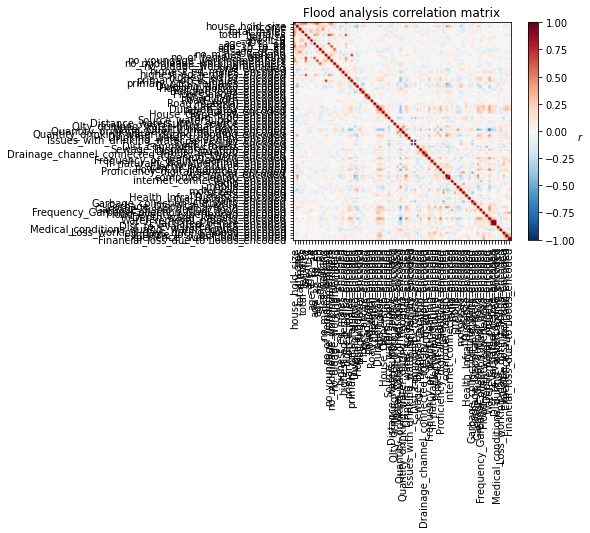

In [25]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)
liste=[]
for i in range(0,76):
    liste.append(i)
ax.set_xticks(liste)
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks(liste)
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Flood analysis correlation matrix")

#plt.tight_layout()

# Principal Component Analysis

In [26]:
X = df_final.iloc[:, 0:].values

### PCA Standardization

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()   
X = sc.fit_transform(X)
# X

### Covariance Matrix

In [28]:
mean_vec=np.mean(X,axis=0)
cov_mat=(X-mean_vec).T.dot((X-mean_vec))/(X.shape[0]-1)
# print(cov_mat)

### Eigen Decomposition on Covariance Matrix

### Printing eigen values for all the columns

In [29]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
li=[]
i=-1
for i, val in enumerate(eig_vals):
    li.append([i,val])
print(li)
#print(eig_vals)
#print(eig_vecs)

[[0, 6.6181025010360734], [1, 5.002184371462703], [2, 3.9080360469351576], [3, 3.3545923520487304], [4, 2.7503334482065642], [5, 2.505518473255103], [6, 2.3888444286743273], [7, 2.081599121868406], [8, 1.9927027884716022], [9, 1.9152410739062142], [10, 1.7127064461704737], [11, 1.5980227742138002], [12, 1.578806737385453], [13, 1.4699531362991016], [14, 1.3952841518377106], [15, 1.3269428434441923], [16, 1.2818612263235878], [17, 1.2382815182852993], [18, 1.2467634448817029], [19, 1.1795402916100568], [20, 1.1033527194172394], [21, 7.191326700058787e-16], [22, 1.0851511362640236], [23, 1.0437778853380766], [24, 0.0003832947577998118], [25, 0.00015170843287250666], [26, 0.08195064008903047], [27, 0.10110765463038324], [28, 0.9728085916751942], [29, 0.9637551918647043], [30, 0.9452378827821627], [31, 0.8998024985779225], [32, 0.13979277958507663], [33, 0.16603731504358038], [34, 0.8654807098985737], [35, 0.8373971340106654], [36, 0.8588352175057006], [37, 0.7998885666870713], [38, 0.7907

### Sum of all Eigen values for all the columns

In [30]:
tot = sum(eig_vals)
print(" \n Sum of all eigen values:",tot)

 
 Sum of all eigen values: 76.10570236439497


### Sorting Eigen values in  descending order to find eigen values of higher magnitude thereby finding out respective columns in the dataset 

### Printing the 60 eigen values in descending order

In [31]:
#i = np.argsort(eig_vals)
eig_valdesc=li
eig_valdesc.sort(reverse=True, key = lambda eig_vals: eig_vals[1])
for i,val in enumerate(eig_valdesc):
    if i <= 59:
        print(i,"  ",val)
        lst2 = [item[0] for item in eig_valdesc]

0    [0, 6.6181025010360734]
1    [1, 5.002184371462703]
2    [2, 3.9080360469351576]
3    [3, 3.3545923520487304]
4    [4, 2.7503334482065642]
5    [5, 2.505518473255103]
6    [6, 2.3888444286743273]
7    [7, 2.081599121868406]
8    [8, 1.9927027884716022]
9    [9, 1.9152410739062142]
10    [10, 1.7127064461704737]
11    [11, 1.5980227742138002]
12    [12, 1.578806737385453]
13    [13, 1.4699531362991016]
14    [14, 1.3952841518377106]
15    [15, 1.3269428434441923]
16    [16, 1.2818612263235878]
17    [18, 1.2467634448817029]
18    [17, 1.2382815182852993]
19    [19, 1.1795402916100568]
20    [20, 1.1033527194172394]
21    [22, 1.0851511362640236]
22    [23, 1.0437778853380766]
23    [28, 0.9728085916751942]
24    [29, 0.9637551918647043]
25    [30, 0.9452378827821627]
26    [31, 0.8998024985779225]
27    [34, 0.8654807098985737]
28    [36, 0.8588352175057006]
29    [35, 0.8373971340106654]
30    [37, 0.7998885666870713]
31    [38, 0.7907781649187262]
32    [41, 0.7660813768191972]
3

In [32]:
arr=np.array(eig_valdesc)
eig_valdesc1=arr[0:60]
total = np.sum(eig_valdesc1, axis = 0)
print("\n","Sum of eigen values for  columns",total[1])


 Sum of eigen values for  columns 73.12963018067214


Here we are taking 60 columns because the sum of eigen values for 60 columns is 73.15884983989889 almost closer to sum of all eigen values

### Printing corresponding 60 columns(features) 

In [33]:
indeces=np.array(lst2)
colmns=indeces[0:60]
# print("\n",colmns)

print("\n",df_final.iloc[:,colmns].columns)


 Index(['house_hold_size', 'income', 'total_males', 'total_females', 'total_tg',
       'age_lt_6', 'age_7_to_14', 'age_15_to_29', 'age_30_to_59', 'age_gt_60',
       'no_males_working', 'no_of_females_working',
       'no_youngage_workingmembers', 'no_middleage_workingmembers',
       'no_oldage_workingmembers', 'zone_encoded', 'highest_ed_males_encoded',
       'highest_ed_tg_encoded', 'highest_ed_females_encoded',
       'primary_occu_males_encoded', 'primary_occu_females_encoded',
       'House_typology_encoded', 'Building level_encoded', 'Category_encoded',
       'Duration_stay_encoded', 'Age_house_encoded', 'House_Ownership_encoded',
       'Distance_watersupply_source_encoded', 'Water_Quality_monsoons_encoded',
       'Qlty_drinking_water_normal days_encoded',
       'Quantity_drinking water_normal days_encoded',
       'Quantity_drinking_water_during_flooding_encoded',
       'Toilet_Facility_encoded', 'Dist_community_toilets_encoded',
       'Sewage_Disposal_System_encoded',

### Applying PCA

For n_components=60

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 60)
X__pca = pca.fit_transform(X) 
# print(X__pca)

###  Finding the explained variance ratio

In [35]:
explained_variance = pca.explained_variance_ratio_
sum(explained_variance)

0.9608480541881238

### Percentage of variance the principal components together contain(for 60 columns)

In [36]:
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
# print("\n\n1. Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
# print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
# print("\n\n3. Percentage of variance the principal components each contain\n ",var_exp[0:60])
print("\n\n4. Percentage of variance the principal components together contain\n",sum(var_exp[0:60]))



4. Percentage of variance the principal components together contain
 96.08955427613911


The percentage of variance for 60 columns is 96.12794779767415 is closer to 100%

In [37]:
# print(abs( pca.components_ ))

## Weightage of individual features(columns) can be determined as below

Here we considering 12 features

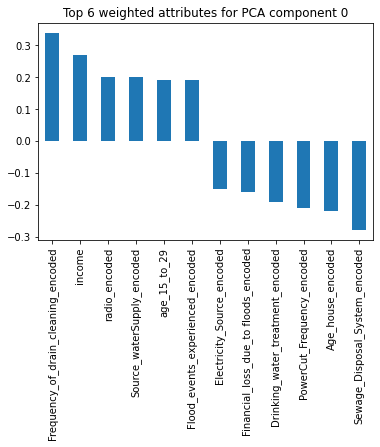

Frequency_of_drain_cleaning_encoded     0.34
income                                  0.27
radio_encoded                           0.20
Source_waterSupply_encoded              0.20
age_15_to_29                            0.19
Flood_events_experienced_encoded        0.19
Electricity_Source_encoded             -0.15
Financial_loss_due_to floods_encoded   -0.16
Drinking_water_treatment_encoded       -0.19
PowerCut_Frequency_encoded             -0.21
Age_house_encoded                      -0.22
Sewage_Disposal_System_encoded         -0.28
Name: 59, dtype: float64

In [38]:
def feature_weight(pca, n_comp, n_feat):
    #df = pd.DataFrame(np.round(pca.components_,2),columns = scaled_data.columns)
    comp = pd.DataFrame(np.round(pca.components_, 2), columns=df_final.keys()).iloc[n_comp - 1]
    comp.sort_values(ascending=False, inplace=True)
    comp = pd.concat([comp.head(n_feat), comp.tail(n_feat)])
    comp.plot(kind='bar', title='Top {} weighted attributes for PCA component {}'.format(n_feat, n_comp))
    plt.show()
    return comp
feature_weight(pca,0,6)

# Screeplot

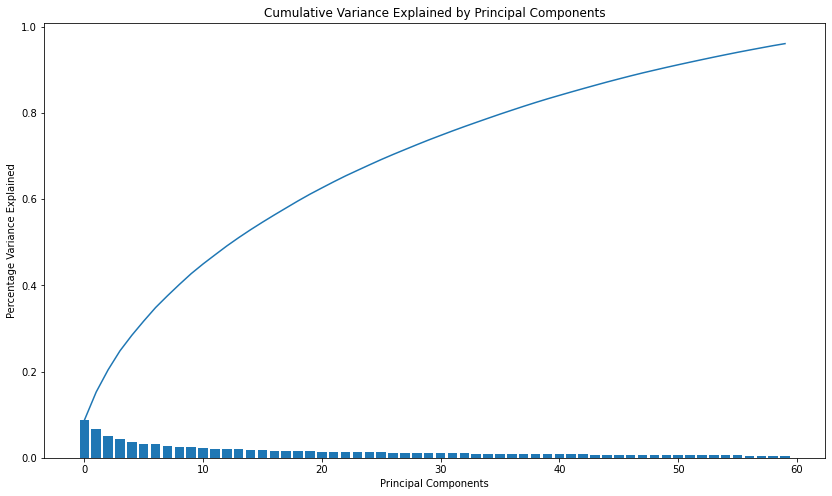

In [39]:
def screeplot(pca):
    var_len = len(pca.explained_variance_ratio_)
    indx = np.arange(var_len)
    plt.figure(figsize=(14, 8))
    ax = plt.subplot()
    cum_var = np.cumsum(explained_variance)
    ax.bar(indx, explained_variance)
    ax.plot(indx, cum_var)
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("Percentage Variance Explained")
    plt.title('Cumulative Variance Explained by Principal Components')
screeplot(pca)

From the above screeplot, we can infer that after 60 components, the curve gets flattened i.e there is no drastic change in variance

In [40]:
dataframe

NameError: name 'dataframe' is not defined

In [ ]:
import csv

mydict = {}

with open('column_key_values - Sheet1.csv', mode='r') as inp:
    reader = csv.reader(inp)
    dict_from_csv = {rows[0]:rows[1] for rows in reader}

print(dict_from_csv)

In [ ]:
df= dataframe.to_dict()
df